# Auto-encoder 利用Minist 做練習

[李弘毅影片](https://www.youtube.com/watch?v=Tk5B4seA-AU&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=25)  
[Hinton_paper](https://www.cs.toronto.edu/~hinton/science.pdf)


## Part1. Deep auto-encoder
#### Step1. 資料預處理

auto-encoder不在乎label data  
這是要利用本身的data經過降維打擊以後再還原成原本的Data的過程  
首先把mnist資料載入並把維度處理成Nx一維

In [1]:
from keras.datasets import mnist
import numpy as np


(x_train,x_label),(y_test,y_label)=mnist.load_data()

x_train=np.reshape(x_train,(len(x_train),-1)).astype('float32')/255
y_test=np.reshape(y_test,(len(y_test),-1)).astype('float32')/255
print(x_train.shape, ' ', y_test.shape)

Using TensorFlow backend.


(60000, 784)   (10000, 784)




![](https://cdn-images-1.medium.com/max/1600/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

#### Step2. 模型建立

auto-encoder--在訓練我們的模型時
我們可以獲得encoder與decorder

首先建立一個只有一層隱藏層的autoencoder  
並且把維度降到2維，來看看結果

In [2]:
from keras.models import Model
from keras.layers import Input, Dense

input_L = Input(shape=(784,))
encoder_L = Dense(2,activation='relu')(input_L)
decoder_L = Dense(784,activation='sigmoid')(encoder_L)
# this is auto-encoder model
auto_en_1 = Model(inputs= input_L, outputs=decoder_L)

# this is encoder model
encoder_1 = Model(inputs= input_L, outputs=encoder_L)

# this is decoder model, need to set a input
input_d_1 = Input(shape=(2,))
decoder_L1 = auto_en_1.layers[-1]
decoder_1 = Model(inputs= input_d_1, outputs=decoder_L1(input_d_1))

auto_en_1.compile(optimizer='adadelta', loss='binary_crossentropy')

auto_en_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [3]:
train_history = auto_en_1.fit(x_train,x_train,batch_size=400,epochs=10,validation_data=(y_test,y_test),verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4927 - val_loss: 0.2848
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2785 - val_loss: 0.2741
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2732 - val_loss: 0.2713
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2711 - val_loss: 0.2697
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.2696 - val_loss: 0.2684
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2683 - val_loss: 0.2672
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.2670 - val_loss: 0.2657
Epoch 8/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.2650 - val_loss: 0.2633
Epoch 9/10
60000/60000 [==============================] - 1s 1

#### Step3. 驗證成果

來比較看看原本的結果跟經過壓所與解壓縮後的結果  
首先來看看降到二維平面上可視化結果

In [4]:
import matplotlib.pyplot as plt

def plot_2D(encoder_function):
    encoder_result = encoder_function.predict(x_train) # check the output
    plt.figure()
    colormap=np.arange(10)
    listplot = [i for i in np.random.randint(0,60000,10000)]
    plt.scatter(encoder_result[listplot,0],encoder_result[listplot,1],c=x_label[listplot],cmap='rainbow')
    plt.colorbar()
    plt.show()

plot_2D(encoder_1)

<Figure size 640x480 with 2 Axes>

可以看到只有一層隱藏層，又把維度壓降到二維的話  
每個數字的特徵並不能很好的分離

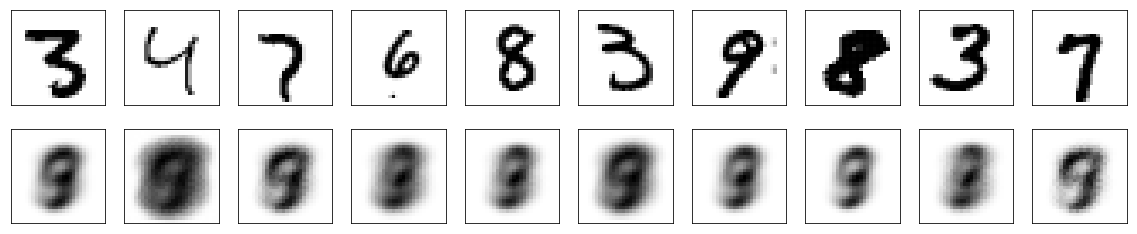

In [5]:
def plot_10_img(auto_encoder_function):
    plt.figure(figsize=(20, 4))
    x_predict = auto_encoder_function.predict(x_train) # output result
    idx=0
    for i in np.random.randint(0,60000,10):
        # show origin image
        ax = plt.subplot(2, 10, idx+1)
        plt.imshow(x_train[i].reshape(28, 28),cmap='binary')
        plt.xticks([])
        plt.yticks([])
        # show reconstruct image
        ax = plt.subplot(2, 10, idx+1+10)
        plt.imshow(x_predict[i].reshape(28, 28),cmap='binary')
        idx+=1
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
    
plot_10_img(auto_en_1)

也因此在重建圖形上的結果不盡人意  
可以看到很多重建後的結果都近似9  
若利用Deep autoencoder來做降維的話  
可以在二維特徵上看到比較好的結果  

In [6]:
encoder1_L = Dense(1000,activation='relu')(input_L)
encoder2_L = Dense(500,activation='relu')(encoder1_L)
encoder3_L = Dense(250,activation='relu')(encoder2_L)
encoder4_L = Dense(32,activation='relu')(encoder3_L)
encoderF_L = Dense(2,activation='relu')(encoder4_L)
decoder1_L = Dense(32,activation='relu')(encoderF_L)
decoder2_L = Dense(250,activation='relu')(decoder1_L)
decoder3_L = Dense(500,activation='relu')(decoder2_L)
decoder4_L = Dense(1000,activation='relu')(decoder3_L)
decoderF_L = Dense(784,activation='sigmoid')(decoder4_L)

# this is auto-encoder model
auto_en_2 = Model(inputs= input_L, outputs=decoderF_L)

# this is encoder model
encoder_2 = Model(inputs= input_L, outputs=encoderF_L)


auto_en_2.compile(optimizer='adam', loss='binary_crossentropy')

auto_en_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8032      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                96        
__________

In [7]:
train_history = auto_en_2.fit(x_train,x_train,batch_size=300,epochs=10,validation_data=(y_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2705 - val_loss: 0.2447
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2362 - val_loss: 0.2300
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2083 - val_loss: 0.1968
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1921 - val_loss: 0.1881
Epoch 5/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1856 - val_loss: 0.1829
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1822 - val_loss: 0.1807
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1799 - val_loss: 0.1790
Epoch 8/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1781 - val_loss: 0.1775
Epoch 9/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1762 - val_loss: 0.1779
Epoch

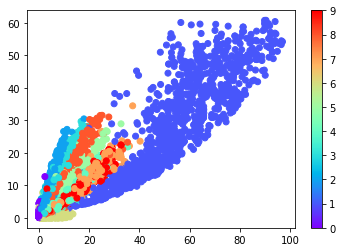

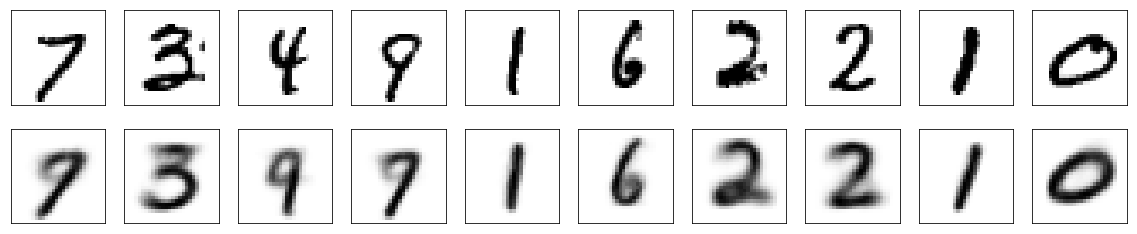

In [8]:
plot_2D(encoder_2)
plot_10_img(auto_en_2)

在還原圖片後也可以看到跟原圖比較接近的結果  

接下來試試壓壓縮到32維看看結果

In [13]:
encoder11_L = Dense(1000,activation='relu')(input_L)
encoder12_L = Dense(500,activation='relu')(encoder11_L)
encoder13_L = Dense(250,activation='relu')(encoder12_L)
encoder1F_L = Dense(32,activation='relu')(encoder13_L)
decoder11_L = Dense(250,activation='relu')(encoder1F_L)
decoder12_L = Dense(500,activation='relu')(decoder11_L)
decoder13_L = Dense(1000,activation='relu')(decoder12_L)
decoder1F_L = Dense(784,activation='sigmoid')(decoder13_L)

auto_en_3 = Model(inputs= input_L, outputs=decoder1F_L)
auto_en_3.compile(optimizer='adam', loss='binary_crossentropy')
auto_en_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_14 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_15 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_16 (Dense)             (None, 32)                8032      
_________________________________________________________________
dense_17 (Dense)             (None, 250)               8250      
_________________________________________________________________
dense_18 (Dense)             (None, 500)               125500    
__________

In [14]:
auto_en_3.fit(x_train,x_train,batch_size=360,epochs=10,validation_data=(y_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2363 - val_loss: 0.1572
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1387 - val_loss: 0.1257
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1186 - val_loss: 0.1103
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1063 - val_loss: 0.1021
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1001 - val_loss: 0.0972
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0961 - val_loss: 0.0936
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0933 - val_loss: 0.0913
Epoch 8/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0908 - val_loss: 0.0899
Epoch 9/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0890 - val_loss: 0.0883
Epoch

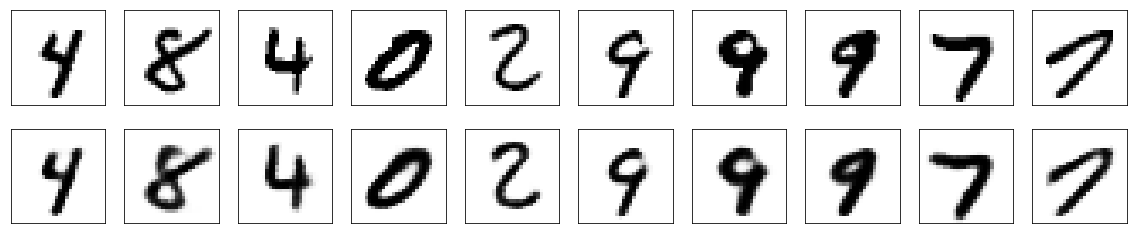

In [15]:
plot_10_img(auto_en_3)

可以看到結果比降到二維還要好得多

## Part2. Convolution auto-encoder  
#### Step1. 建立模型  
另外可以利用CNN的方式做auto-encoder  
由於是用圖形當作輸入，所以可以利用CNN的方式來做，可以更快的訓練，得到更好的結果

In [45]:
from keras.layers import Conv2D, MaxPool2D, UpSampling2D

Input_dim= Input(shape=(28,28,1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(Input_dim)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encode_conv = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encode_conv)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decod_conv = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


auto_en_conv = Model(Input_dim, decod_conv)


auto_en_conv.compile(optimizer='adam', loss='binary_crossentropy')
auto_en_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 8)           0         
__________

可以看到訓練參數量只有少少的4K!
#### Step2. 訓練與觀看結果


In [46]:
(x_train_conv,_),(y_test_conv,_)=mnist.load_data()

x_train_conv = x_train_conv.reshape(len(x_train_conv),28,28,1)/255
y_test_conv = y_test_conv.reshape(len(y_test_conv),28,28,1)/255

auto_en_conv.fit(x_train_conv,x_train_conv,batch_size=360,epochs=30,validation_data=(y_test_conv,y_test_conv),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2760 - val_loss: 0.1719
Epoch 2/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.1517 - val_loss: 0.1368
Epoch 3/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1313 - val_loss: 0.1246
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1222 - val_loss: 0.1181
Epoch 5/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1168 - val_loss: 0.1134
Epoch 6/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.1131 - val_loss: 0.1104
Epoch 7/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.1103 - val_loss: 0.1079
Epoch 8/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1081 - val_loss: 0.1084
Epoch 9/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.1063 - val_loss: 0.1041
Epoch

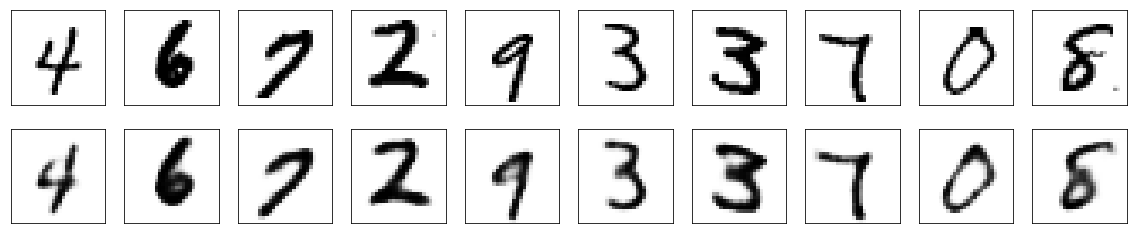

In [58]:
def plot_10_img_conv(auto_encoder_function,x_data,compare_img=x_train):
    plt.figure(figsize=(20, 4))
    x_predict = auto_encoder_function.predict(x_data) # output result
    idx=0
    for i in np.random.randint(0,60000,10):
        # show origin image
        ax = plt.subplot(2, 10, idx+1)
        plt.imshow(compare_img[i].reshape(28, 28),cmap='binary')
        plt.xticks([])
        plt.yticks([])
        # show reconstruct image
        ax = plt.subplot(2, 10, idx+1+10)
        plt.imshow(x_predict[i].reshape(28, 28),cmap='binary')
        idx+=1
        plt.xticks([])
        plt.yticks([])
    plt.show()

plot_10_img_conv(auto_en_conv,x_train_conv)

Convolution autoencoder因為參數量較少，所以需要較多次的epoch來做訓練  
可以看到最後的效果還算不錯


## Part3. 實際應用- 影像去噪
Convolution autoencoder還有為去圖像噪點的實用性  
卷積的特性就是萃取出影像特徵，而噪點這種隨機亂度的不規則圖像會在萃取過層被濾掉

#### Step1. 製作隨機噪點

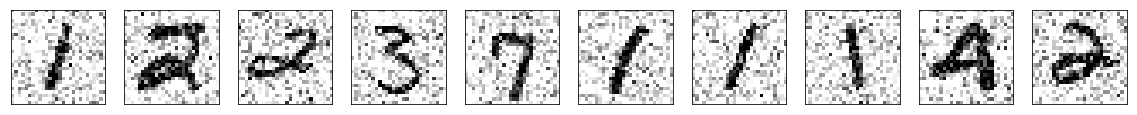

In [60]:
noise_factor = 0.3

x_train_noisy = x_train_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_conv.shape) 
y_test_noisy = y_test_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=y_test_conv.shape) 

x_train_noisy = np.clip(x_train_noisy,0.,1.)
y_test_noisy = np.clip(y_test_noisy,0.,1.)
plt.figure(figsize=(20, 2))
idx=0
for i in np.random.randint(0,60000,10):
    # show origin image
    ax = plt.subplot(1, 10, idx+1)
    ax.imshow(x_train_noisy[i].reshape(28, 28),cmap='binary')
    plt.xticks([])
    plt.yticks([])
    idx+=1
    # show reconstruct image
plt.show()

#### Step2. 訓練模型與查看結果

利用剛剛建立的模型來訓練

In [56]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
y_test_noisy = np.clip(y_test_noisy,0.,1.)
auto_en_conv_noise = clone_model(auto_en_conv)

auto_en_conv_noise.compile(optimizer='adam', loss='binary_crossentropy')
auto_en_conv_noise.fit(x_train_noisy,x_train_conv,batch_size=360,epochs=30,validation_data=(y_test_noisy,y_test_conv),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.2731 - val_loss: 0.1874
Epoch 2/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1700 - val_loss: 0.1567
Epoch 3/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1497 - val_loss: 0.1415
Epoch 4/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1379 - val_loss: 0.1333
Epoch 5/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.1306 - val_loss: 0.1267
Epoch 6/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.1257 - val_loss: 0.1225
Epoch 7/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1221 - val_loss: 0.1193
Epoch 8/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1197 - val_loss: 0.1172
Epoch 9/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.1177 - val_loss: 0.1155
Epoch

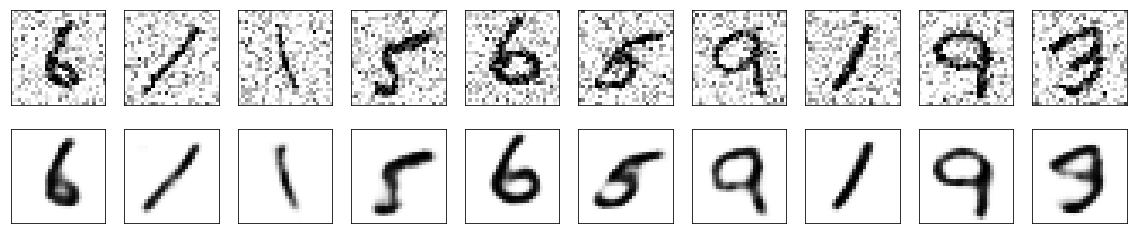

In [61]:
plot_10_img_conv(auto_en_conv_noise,x_train_noisy,x_train_noisy)

可以看到噪點都消失了  